# Loan Borrower Rate and Repayment Explained

### by Omotayo Adeniran

## Investigation Overview

<p>The analysis was focused on how borrower's APR were being fixed, who's likely to get a better rate of return, is it based on the loan size? or is it based on the income power? could it also have been a factor of the credit score?
<p>On further analysis, the demography of the borrowers was also looked at and categories of those that are more likely to default in their repayment.


## Dataset Overview

For the analysis, the variables of interest were carefully selected after studying the variable dictionary, this will allow faster coding experience and allow vizzes rendering faster. 

In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [3]:
# load in the dataset into a pandas dataframe
df= pd.read_csv('prosperLoanData.csv')

In [5]:
# Selecting the variable of interest for this analysis. 
# This was preselected on Excel after careful examination and investigation of each variables 
selected = ['ListingNumber',
'ListingCreationDate',
'Term',
'LoanStatus',
'BorrowerAPR',
'BorrowerRate',
'LenderYield',
'ProsperRating (Alpha)',
'ProsperScore',
'ListingCategory (numeric)',
'BorrowerState',
'EmploymentStatus',
'EmploymentStatusDuration',
'IsBorrowerHomeowner',
'CreditScoreRangeLower',
'CreditScoreRangeUpper',
'InquiriesLast6Months',
'TotalInquiries',
'CurrentDelinquencies',
'AmountDelinquent',
'DelinquenciesLast7Years',
'DebtToIncomeRatio',
'IncomeRange',
'StatedMonthlyIncome',
'TotalProsperLoans',
'ProsperPrincipalBorrowed',
'ProsperPrincipalOutstanding',
'LoanCurrentDaysDelinquent',
'LoanFirstDefaultedCycleNumber',
'LoanMonthsSinceOrigination',
'LoanOriginalAmount',
'LoanOriginationDate',
'LoanOriginationQuarter',
'MonthlyLoanPayment'
]
loan = df.loc[:,selected]

## Borrower's APR

This is a really interesting plot, there seems to be lesser disparity in the allocated `borrower's APR` with increasing loan size. We could almost see convergence towards the larger loan size. 

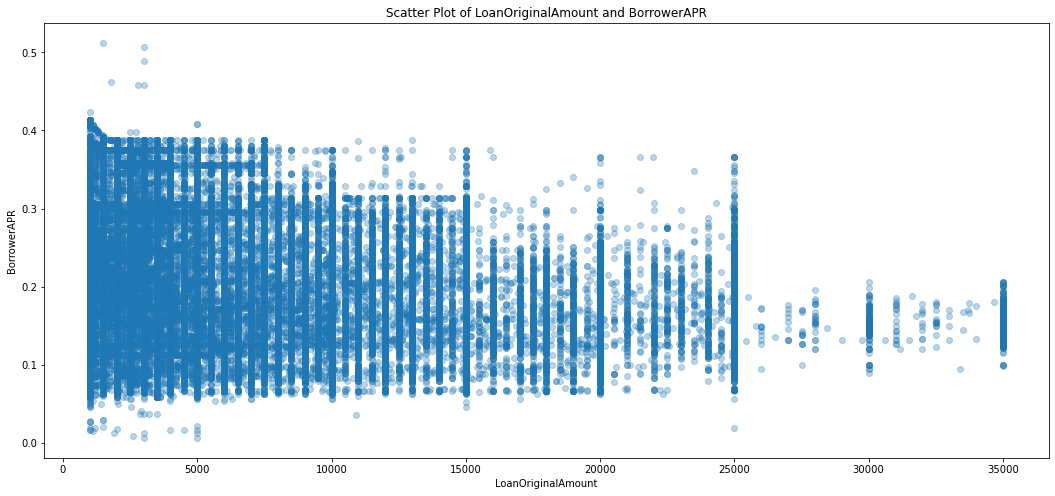

In [15]:
plt.figure(figsize = [18, 8]) 
plt.scatter(data = loan.sample(100000), x = 'LoanOriginalAmount', y = 'BorrowerAPR',  alpha =  0.3) # sample is used to help render faster
plt.title('Scatter Plot of LoanOriginalAmount and BorrowerAPR')
plt.xlabel('LoanOriginalAmount')
plt.ylabel('BorrowerAPR');

## Borrower APR (Credit Score as a Factor)

From the visualisation, we could see that concentration of borrower APR seems to fizzle down with increasing credit score.

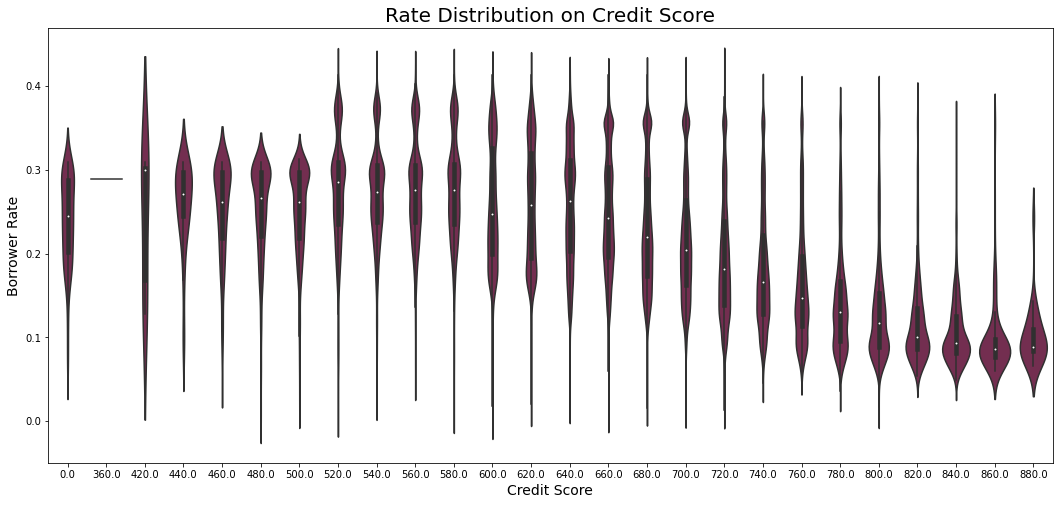

In [18]:
plt.figure(figsize = [18, 8]) 
base_color = sb.color_palette(palette= 'twilight_shifted')[5]
sb.violinplot(data=loan, x='CreditScoreRangeLower', y='BorrowerAPR', color = base_color)
plt.xlabel('Credit Score', fontsize=14)
plt.title('Rate Distribution on Credit Score',fontdict={'fontsize':20})
plt.ylabel('Borrower Rate', fontsize=14);

## Loan Repayment

Knowing the employment status of a borrower can help figure how likely the borrower is going to default. As shown below, borrowers with no employmment status keyed into the record are more likely to default their loan repayment.

In [10]:
# creating a new column to indicate if a borrower defaulted in repaying a loan
loan['defaulted'] = np.where(loan['CurrentDelinquencies']> 0, True, False)

# Creating a function to plot defaulters across different categories.
def delplot(x, y, title):
    '''Just enter the variable x which should be categorical and y should be the hue'''
    loan.groupby([x,y]).size().unstack().plot(kind='bar', stacked=True, figsize=[15, 7], title= title,
    ylabel = 'Borrower\'s Count')
# Creating a function to plot defaulters across different categories but this time in proportion of 100
def proplot(x, y, title):
    '''Just enter the variable x which should be categorical and y should be the hue'''
    loan.groupby(x)[y].value_counts(normalize= True).mul(100).unstack().plot(kind= 'bar', stacked = True,  width= .9, 
    figsize=(15,7), rot=90, title= title, ylabel='Defaulter\'s proportion');

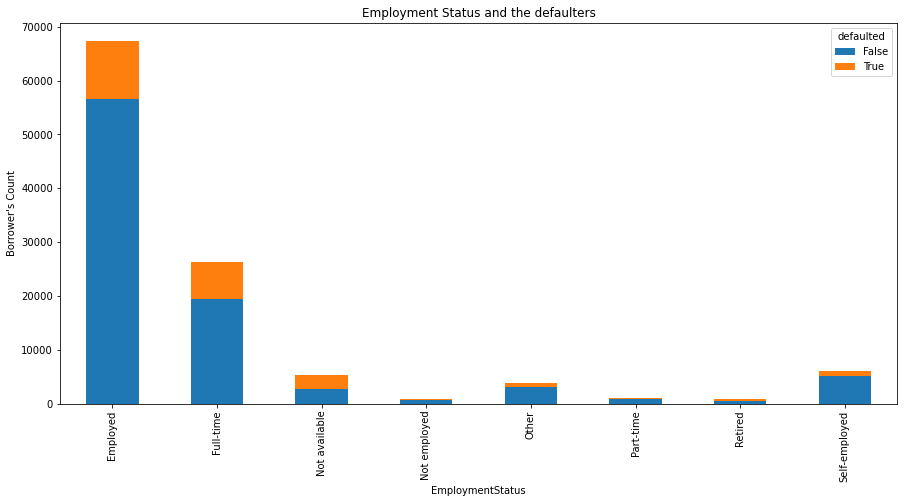

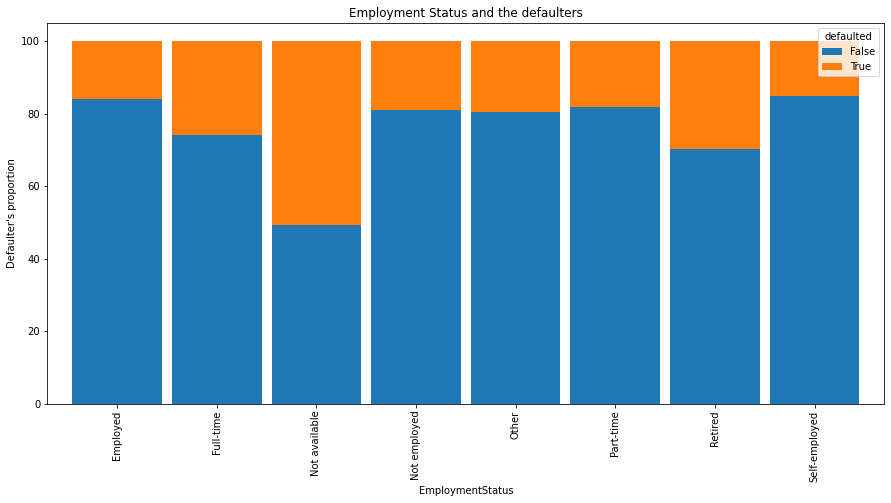

In [11]:
delplot('EmploymentStatus', 'defaulted', 'Employment Status and the defaulters')
proplot('EmploymentStatus', 'defaulted', 'Employment Status and the defaulters')

**Thank You**

In [ ]:
!jupyter nbconvert Part_II_slide_deck.ipynb --to slides --post serve --no-input --no-prompt